<a href="https://colab.research.google.com/github/vishvani/GRU-LSTM-RNN/blob/main/assignment149.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#gru

In [3]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dense
from tensorflow.keras.preprocessing import sequence
max_words = 5000
(xt,yt),(xte,yte)= imdb.load_data(num_words=max_words)

max_len =500
xt=sequence.pad_sequences(xt,maxlen=max_len)
xte=sequence.pad_sequences(xte,maxlen=max_len)

model=Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size=128
epochs=5
history=model.fit(xt,yt,batch_size=batch_size,epochs=epochs)
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)


17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
196/196 [==============================] - 57s 249ms/step - loss: 0.5526 - accuracy: 0.7028
Epoch 2/5
196/196 [==============================] - 25s 127ms/step - loss: 0.3072 - accuracy: 0.8743
Epoch 3/5
196/196 [==============================] - 18s 94ms/step - loss: 0.2535 - accuracy: 0.8992
Epoch 4/5
196/196 [==============================] - 14s 69ms/step - loss: 0.1969 - accuracy: 0.9265
Epoch 5/5
196/196 [==============================] - 3s 12ms/step - loss: 0.3160 - accuracy: 0.8802
accuracy: 0.8802000284194946
loss: 0.31600460410118103


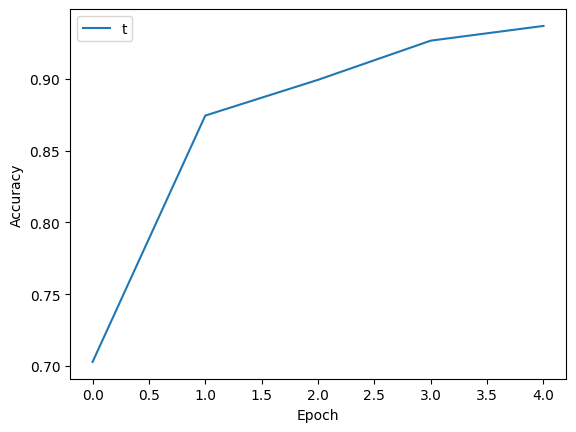

In [7]:
train_acc1 = history.history['accuracy']
xc1=range(len(train_acc1))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc1, train_acc1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

# lstm

In [10]:
from tensorflow.keras.layers import Embedding,LSTM,Dense
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 5
batch_size = 128

hist=model.fit(xt, yt, epochs=epochs, batch_size=batch_size)
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)


Epoch 1/5
196/196 [==============================] - 37s 177ms/step - loss: 0.4333 - accuracy: 0.7944
Epoch 2/5
196/196 [==============================] - 22s 114ms/step - loss: 0.2867 - accuracy: 0.8864
Epoch 3/5
196/196 [==============================] - 16s 81ms/step - loss: 0.2477 - accuracy: 0.9036
Epoch 4/5
196/196 [==============================] - 11s 54ms/step - loss: 0.2132 - accuracy: 0.9191
Epoch 5/5
196/196 [==============================] - 3s 14ms/step - loss: 0.3461 - accuracy: 0.8696
accuracy: 0.8695600032806396
loss: 0.34606659412384033


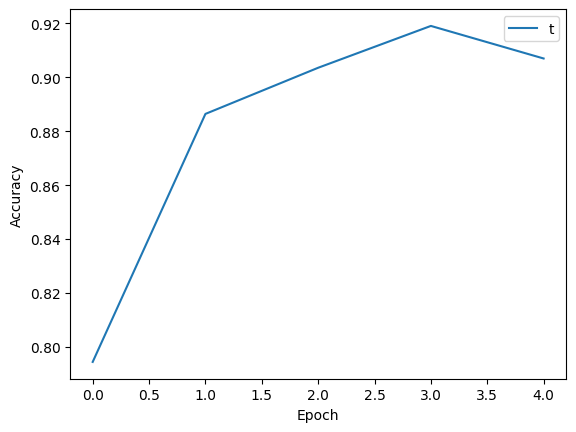

In [11]:
train_acc2 = hist.history['accuracy']
xc2=range(len(train_acc2))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc2, train_acc2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

#rnn

In [4]:
from tensorflow.keras.layers import Embedding,RNN
from keras import layers
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 4
batch_size = 128

h=model.fit(xt, yt, epochs=epochs, batch_size=batch_size, validation_split=0.2)
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

Epoch 1/4
157/157 [==============================] - 34s 195ms/step - loss: 0.5042 - accuracy: 0.7374 - val_loss: 0.3513 - val_accuracy: 0.8504
Epoch 2/4
157/157 [==============================] - 22s 139ms/step - loss: 0.2764 - accuracy: 0.8888 - val_loss: 0.3271 - val_accuracy: 0.8758
Epoch 3/4
157/157 [==============================] - 17s 105ms/step - loss: 0.2242 - accuracy: 0.9133 - val_loss: 0.3305 - val_accuracy: 0.8634
Epoch 4/4
196/196 [==============================] - 3s 14ms/step - loss: 0.3437 - accuracy: 0.8644
accuracy: 0.8644400238990784
loss: 0.3437228202819824


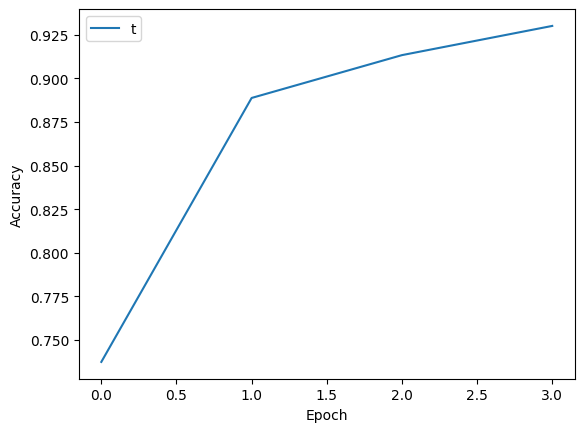

In [5]:
train_loss3 = h.history['loss']
train_acc3 = h.history['accuracy']
xc3=range(len(train_loss3))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

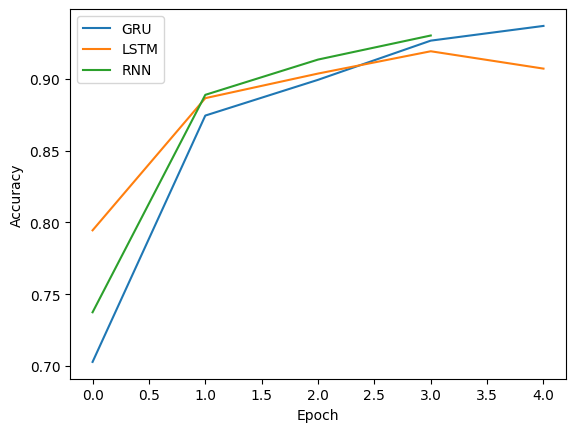

In [12]:
plt.plot(xc1, train_acc1)
plt.plot(xc2, train_acc2)
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["GRU","LSTM","RNN"])